### Домашнее задание 4

In [19]:
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from scipy.sparse import identity
plt.style.use('ggplot')

#### Построение матрицы А из задачи 3

In [5]:
def matrix_A(N):
    h = 1 / (N + 1)
    x = np.linspace(h, 1, num=N, endpoint=False)
    y = np.linspace(h, 1, num=N, endpoint=False)
    
    rows = []
    cols = []
    data = []
    for i in range(N):
        for j in range(N):
            k = i + j * N
            
            rows.append(k)
            cols.append(k)
            data.append(4 / (h ** 2) + np.exp(x[i] * y[j]))
            
            if i >= 1:
                k_ = k - 1
                rows.append(k)
                cols.append(k_)
                data.append(- 1 / (h ** 2))
                
            if i <= N - 2:
                k_ = k + 1
                rows.append(k)
                cols.append(k_)
                data.append(- 1 / (h ** 2))
                
            if j >= 1:
                k_ = k - N
                rows.append(k)
                cols.append(k_)
                data.append(- 1 / (h ** 2))
            
            if j <= N - 2:
                k_ = k + N
                rows.append(k)
                cols.append(k_)
                data.append(- 1 / (h ** 2))
                        
    A = csr_matrix((data, (rows, cols)))
    
    return A

#### 1. Максимальное собственное значение методом прямых итераций

In [6]:
def direct_iter(A, eps=1e-8, max_iter=1000):
    n = A.shape[0]
    u = np.ones((n, 1))
    for i in range(max_iter):

        dot_u = u.T @ u
        uk = A @ u
        eig_value_k = (uk.T @ u) / dot_u
        
        if i > 0 and np.abs(eig_value_k - eig_value) <= eps:
            break
        
        u = uk / np.linalg.norm(uk)
        eig_value = eig_value_k
        
    return eig_value_k

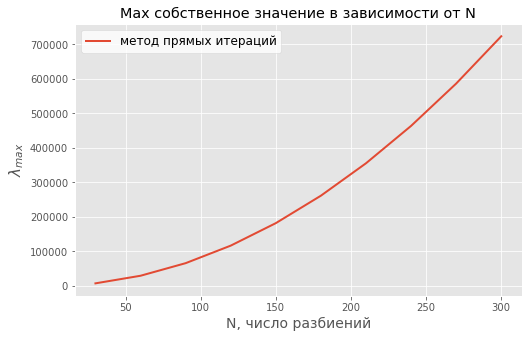

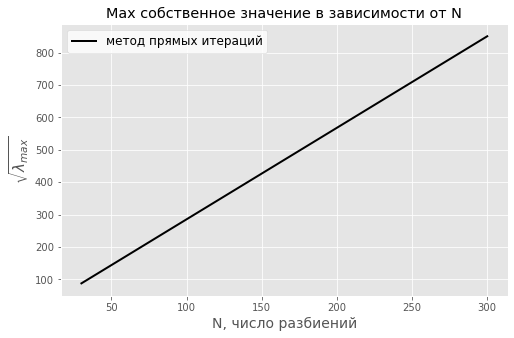

In [133]:
N = 300
step = int(N / 10)
n_array = np.array(range(step, N + 1, step))
eig_values = np.array([])
for n in n_array:
    A = matrix_A(n)
    eig_values = np.append(eig_values, direct_iter(A))
    
plt.figure(figsize=(8,5))
plt.plot(n_array, eig_values, label='метод прямых итераций', linewidth=2)
plt.legend(facecolor='white', fontsize=12)
plt.title('Max собственное значение в зависимости от N')
plt.xlabel('N, число разбиений', fontsize=14)
plt.ylabel('$\lambda_{max}$', fontsize=15)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(n_array, np.sqrt(eig_values), label='метод прямых итераций', color='black', linewidth=2)
plt.legend(facecolor='white', fontsize=12)
plt.title('Max собственное значение в зависимости от N')
plt.xlabel('N, число разбиений', fontsize=14)
plt.ylabel('$\sqrt{\lambda_{max}}$', fontsize=15)
plt.show()

После взятия квадратного корня от максимальных собственных чисел с первого графика, получили явную линейную зависимость на втором графике. 

То есть зависимость максимального собственного числа от $N$ квадратична

#### 2. Минимальное собственное значение с помощью метода прямых итераций со сдвигом

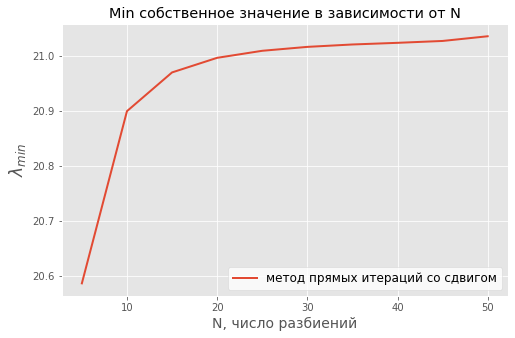

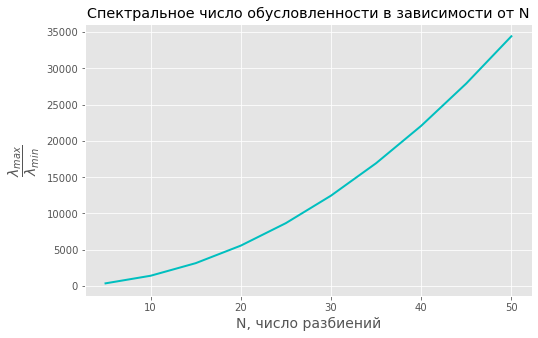

Wall time: 843 ms


In [131]:
%%time
N = 50
tol = 1e-8
step = int(N / 10)
n_array = np.array(range(step, N + 1, step))
min_eig_values = np.array([])
for n in n_array:
    A = matrix_A(n)
    alpha = direct_iter(A)[0][0]
    A_new = A - identity(n ** 2) * alpha #  метод прямых итераций со сдвигом
    min_eig_values = np.append(min_eig_values, direct_iter(A_new) + alpha)
  
plt.figure(figsize=(8,5))
plt.plot(n_array, min_eig_values, label='метод прямых итераций со сдвигом', linewidth=2, markersize=8)
plt.legend(facecolor='white', fontsize=12)
plt.title('Min собственное значение в зависимости от N')
plt.xlabel('N, число разбиений', fontsize=14)
plt.ylabel('$\lambda_{min}$', fontsize=17)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(n_array, eig_values[:] / min_eig_values, linewidth=2, color='c', markersize=8)
plt.title('Спектральное число обусловленности в зависимости от N')
plt.xlabel('N, число разбиений', fontsize=14)
plt.ylabel('$\dfrac{\lambda_{max}}{\lambda_{min}}$', fontsize=14)
plt.show()

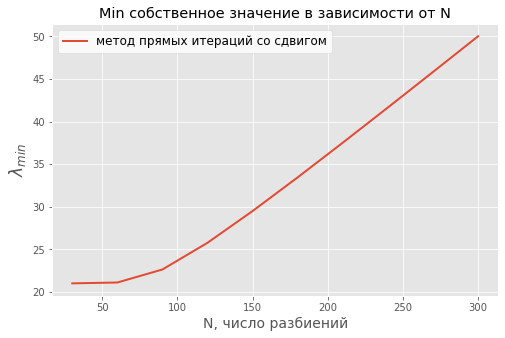

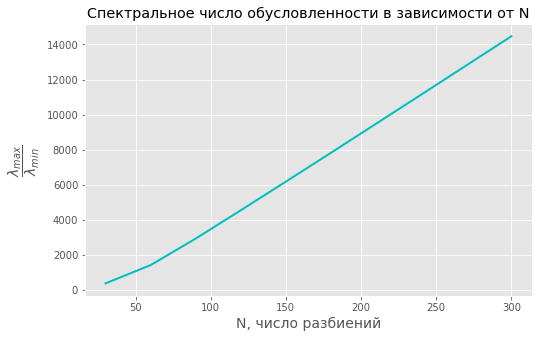

Wall time: 14.5 s


In [132]:
%%time
N = 300
tol = 1e-8
step = int(N / 10)
n_array = np.array(range(step, N + 1, step))
min_eig_values = np.array([])
for n in n_array:
    A = matrix_A(n)
    alpha = direct_iter(A)[0][0]
    A_new = A - identity(n ** 2) * alpha #  метод прямых итераций со сдвигом
    min_eig_values = np.append(min_eig_values, direct_iter(A_new) + alpha)
  
plt.figure(figsize=(8,5))
plt.plot(n_array, min_eig_values, label='метод прямых итераций со сдвигом', linewidth=2, markersize=8)
plt.legend(facecolor='white', fontsize=12)
plt.title('Min собственное значение в зависимости от N')
plt.xlabel('N, число разбиений', fontsize=14)
plt.ylabel('$\lambda_{min}$', fontsize=17)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(n_array, eig_values[:] / min_eig_values, linewidth=2, color='c', markersize=8)
plt.title('Спектральное число обусловленности в зависимости от N')
plt.xlabel('N, число разбиений', fontsize=14)
plt.ylabel('$\dfrac{\lambda_{max}}{\lambda_{min}}$', fontsize=14)
plt.show()

При больших значениях $N$ видим прямую линейную зависимость спектрального числа обсусловленности от $N$ - количества разбиений. В целом, спектральное число матрицы А возрастает с ростом $N$

#### 3. Сравнение скорости сходимости методов Якоби и Зейделя

In [126]:
N = 50
step = int(N / 25)
n_array = np.array(range(5, N + 1, step))
q1 = np.array([])
q2 = np.array([])
for n in n_array:
    A = matrix_A(n).A
    
    # Зейдель
    D = np.diag(np.diag(A))
    L = np.tril(A, k=-1)
    U = np.triu(A, k=1)
    M = np.linalg.inv(D + L) @ U
    q1 = np.append(q1, direct_iter(np.abs(M)))
    
    # Якоби
    B = A - D
    D = np.linalg.inv(D)
    M = D @ B
    q2 = np.append(q2, direct_iter(np.abs(M)))

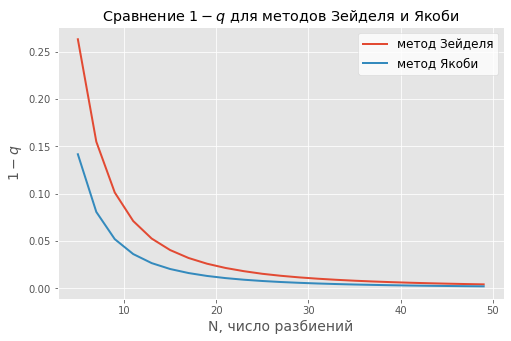

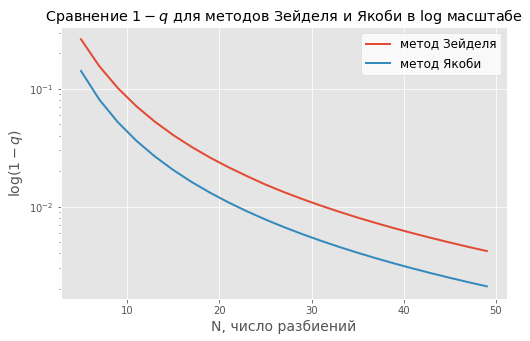

In [130]:
plt.figure(figsize=(8,5))
plt.plot(n_array, 1 - q1, label='метод Зейделя', linewidth=2)
plt.plot(n_array, 1 - q2, label='метод Якоби', linewidth=2)
plt.legend(facecolor='white', fontsize=12)
plt.title('Сравнение $1-q$ для методов Зейделя и Якоби')
plt.legend(facecolor='white', fontsize=12)
plt.xlabel('N, число разбиений', fontsize=14)
plt.ylabel('$1-q$', fontsize=14)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(n_array, 1 - q1, label='метод Зейделя', linewidth=2)
plt.plot(n_array, 1 - q2, label='метод Якоби', linewidth=2)
plt.legend(facecolor='white', fontsize=12)
plt.title('Сравнение $1-q$ для методов Зейделя и Якоби в log масштабе')
plt.legend(facecolor='white', fontsize=12)
plt.xlabel('N, число разбиений', fontsize=14)
plt.ylabel('$\log{(1-q)}$', fontsize=14)
plt.yscale('log')
plt.show()

Из графика видим, что метод Зейделя сходится быстрее метода Якоби